In [54]:
import bs4
from dotenv import load_dotenv
from jupyter_lsp.schema import LANGUAGE_SERVER_SPEC
from langchain_core.prompts import ChatPromptTemplate

load_dotenv()
import os
assert os.environ.get("OPENAI_API_KEY") != ""


In [55]:
from langchain_openai import OpenAIEmbeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-large")

In [56]:
from langchain_core.vectorstores import InMemoryVectorStore

In [57]:
vector_store = InMemoryVectorStore(embeddings)

In [58]:
from langchain_community.document_loaders import WebBaseLoader

In [59]:
from bs4 import SoupStrainer
loader = WebBaseLoader(
    web_path="https://lilianweng.github.io/posts/2023-06-23-agent/",
    bs_kwargs=dict(
        parse_only=SoupStrainer(
            class_=("post-content","post-title","post-header")
        )
    ),
)

In [60]:
docs = loader.load()

In [12]:
docs[0]

Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes

In [61]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [62]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

In [63]:
all_splits = text_splitter.split_documents(docs)

In [64]:
vector_store.add_documents(all_splits)

['5656e969-9f7f-4ad1-a0e4-a478524258bf',
 '448aaa25-b434-4d91-895c-0d9fbd29858a',
 'a310776e-461e-46ae-89c5-3851bfb0df18',
 'bc7dc749-1e0a-4fc6-948b-d7e0d05e09f9',
 'e0c565d5-a8b9-40ab-91b3-f6d4dc9b526e',
 '2a15fb71-2033-406a-8ae9-e74bc5755970',
 'd5a71756-cea8-4c8a-9ce3-ddfbf44f73e5',
 '1772901a-265b-402e-a974-d42dc500eed2',
 '217a94cf-0c3e-4501-ae86-a5b19fb09951',
 '1965d537-d45e-4320-9846-d047be817c26',
 'a7e447fc-ccdd-4579-af52-01ed9a79fb63',
 '6ee2fdef-6ca0-4d38-bd03-9384c3295556',
 'bfb27ee8-d3ae-4179-81aa-f0d374487d55',
 '8f917b77-ea37-407e-89ee-d2998259ea33',
 'd73fc245-8900-4c0a-839c-91f977367980',
 '5d1caf41-5ace-4201-b78c-f9e3df62e34b',
 '2b27cc6d-d23d-46a1-a8ba-feda79c96057',
 '66e4205e-bd45-4e2c-8139-36e544b6807f',
 '6e5a0bbf-6406-4288-92a7-d59363f86abf',
 'a71a3267-3402-4365-ad9f-3b7861f32606',
 'd4f1f08f-1ffd-47bc-b449-181458f169e2',
 '97cde1ad-cdae-4332-9529-24fa964a2df9',
 'bacdd89f-d117-4189-ada3-93cfe692c068',
 'ae557cf5-32dc-4473-b9ba-70f5d09a2591',
 'eee66d76-377f-

In [19]:
all_splits[2]

Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.')

In [20]:
from langchain import hub

In [65]:
from langchain_core.prompts import ChatPromptTemplate

In [66]:
prompt = ChatPromptTemplate(messages=["""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question}
Context: {context}
Answer:"""])

In [67]:
prompt.invoke({"context":"(context goes here)","question":"(question goes here)"})

ChatPromptValue(messages=[HumanMessage(content="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: (question goes here)\nContext: (context goes here)\nAnswer:", additional_kwargs={}, response_metadata={})])

In [30]:
results = vector_store.similarity_search("explain agentic framework")

In [31]:
results

[Document(id='c44f81c4-b8a7-4bc3-b987-c0ed477f4f07', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 13. The generative agent architecture. (Image source: Park et al. 2023)\nThis fun simulation results in emergent social behavior, such as information diffusion, relationship memory (e.g. two agents continuing the conversation topic) and coordination of social events (e.g. host a party and invite many others).\nProof-of-Concept Examples#\nAutoGPT has drawn a lot of attention into the possibility of setting up autonomous agents with LLM as the main controller. It has quite a lot of reliability issues given the natural language interface, but nevertheless a cool proof-of-concept demo. A lot of code in AutoGPT is about format parsing.\nHere is the system message used by AutoGPT, where {{...}} are user inputs:\nYou are {{ai-name}}, {{user-provided AI bot description}}.\nYour decisions must always be made independently without seeking user assis

In [68]:
from langchain_core.documents import Document

In [85]:
from typing_extensions import List, TypedDict

In [86]:
class State(TypedDict):
    q : str
    c: List[Document]
    a: str

In [50]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["q"])
    return {"c": retrieved_docs}


In [87]:
def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["c"])
    messages = prompt.invoke({"question":state["q"], "context":docs_content})
    response = llm.invoke(messages)
    return {"a":response.content}

In [88]:
from langgraph.graph import START, StateGraph

In [89]:
graph_builder = StateGraph(State).add_sequence([retrieve, generate])

In [90]:
graph_builder.add_edge(START, "retrieve")

In [91]:
graph = graph_builder.compile()

In [92]:
from IPython.display import Image, display


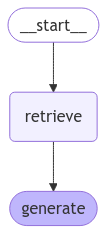

In [93]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [94]:
from langchain_openai import ChatOpenAI

In [95]:
llm = ChatOpenAI(model_name="gpt-4o-mini")


In [96]:
result = graph.invoke({"q":"What is Task Decomposition?"})

ValidationError: 3 validation errors for State
question
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing
context
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing
answer
  Field required [type=missing, input_value={}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing

In [111]:
from langchain_core.documents import Document
#from typing_extensions import List, TypedDict
from typing import List
from pydantic import BaseModel


class State(BaseModel):
    question: str
    context: List[Document]
    answer: str

In [112]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state.question)
    state.context = retrieved_docs
    return state


def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state.context)
    messages = prompt.invoke({"question": state.question, "context": docs_content})
    response = llm.invoke(messages)
    state.answer = response.content
    return state

In [113]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

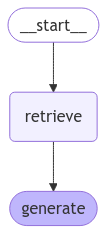

In [114]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [115]:
result = graph.invoke(State(
    context=[],
    question="What is Task Decomposition?",
    answer=""
))

print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

Context: [Document(id='a310776e-461e-46ae-89c5-3851bfb0df18', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.'), Document(id='bc7dc749-1e0a-4fc6-948b-d7e0d05e09f9', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibiliti

In [102]:
for step in graph.stream(
    {"question": "What is Task Decomposition?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(id='a310776e-461e-46ae-89c5-3851bfb0df18', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Fig. 1. Overview of a LLM-powered autonomous agent system.\nComponent One: Planning#\nA complicated task usually involves many steps. An agent needs to know what they are and plan ahead.\nTask Decomposition#\nChain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms big tasks into multiple manageable tasks and shed lights into an interpretation of the model’s thinking process.'), Document(id='bc7dc749-1e0a-4fc6-948b-d7e0d05e09f9', metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reaso